In [89]:
from IPython.display import HTML
HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [7]:
# Libraries
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_columns', 100)

In [9]:
wnba = pd.read_csv('../data/wnba_clean.csv')

In [96]:
print("""
To finalise, we would like to conclude with an analysis on the start players. 
The question to assess whether having 'star' players made Minesota stand out during the championship.

We first established an Efficiency test based on NBA ratings including the follwing characteristics:
PTS + REB + AST + STL + BLK − ((FGA − FGM) + (FTA − FTM) + TO))
The purpose is to determine who were the best players during the 2017 season.

""")


To finalise, we would like to conclude with an analysis on the start players. 
The question to assess here is whether having 'star' players made Minesota stand out during the championship.

We first established an Efficiency test based on NBA ratings including the follwing characteristics:
PTS + REB + AST + STL + BLK − ((FGA − FGM) + (FTA − FTM) + TO))
The purpose is to determine who were the best players during the 2017 season.




In [97]:
#EFF: efficiency: NBA's efficiency rating: (PTS + REB + AST + STL + BLK − ((FGA − FGM) + (FTA − FTM) + TO))
wnba["Player Efficiency"] = wnba['PTS'] + wnba['REB'] + wnba['AST'] + wnba['STL'] + wnba['BLK'] - ((wnba['FGA'] - wnba['FGM']) + (wnba['FTA'] - wnba['FTM']) + wnba['TO'])

wnba["Player Efficiency per 36"] = wnba["Player Efficiency"]/wnba['MIN']*36


In [98]:
top10= wnba.sort_values(by = ["Player Efficiency per 36"], ascending = False).head(10)

top10

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Player Efficiency,Player Efficiency per 36,Minutes played by player per game,Experience of a player,Experience normalised,PTS_percent,Cumulative share of points scored,Cumulative number of players,Season_winner
24,Brittany Boyd,NY,G,175,71,23.183673,US,"November 6, 1993",23,UC Berkeley,3,2,32,9,15,60.0,0,1,0.0,8,11,72.7,3,5,8,5,3,0,2,26,0,0,31,34.875000,16.000000,3,0.333333,0.012241,1.000000,12,False
130,Sylvia Fowles,MIN,C,198,96,24.487297,US,"June 10, 1985",32,LSU,10,29,895,222,336,66.1,0,0,0.0,128,162,79.0,113,184,297,39,39,61,71,572,16,0,789,31.736313,30.862069,10,0.666667,0.199234,0.199234,1,True
69,Jordan Hooper,CHI,F,188,84,23.766410,US,"February 20, 1992",25,Nebraska,3,29,833,164,299,54.8,22,49,44.9,117,142,82.4,108,226,334,40,29,46,46,467,17,0,710,30.684274,28.724138,3,0.272727,0.196797,0.196797,1,False
25,Brittney Griner,PHO,C,206,93,21.915355,US,"October 18, 1990",26,Baylor,5,22,682,167,293,57.0,0,0,0.0,127,154,82.5,43,129,172,39,13,54,52,461,6,0,534,28.187683,31.000000,5,0.384615,0.177718,0.177718,1,False
102,Nneka Ogwumike,LA,F,188,79,22.351743,US,"February 7, 1990",27,Stanford,6,30,948,215,386,55.7,18,49,36.7,129,148,87.2,57,179,236,63,53,14,47,577,9,0,706,26.810127,31.600000,6,0.500000,0.238135,0.238135,1,False
28,Candace Parker,LA,F/C,193,79,21.208623,US,"April 19, 1986",31,Tennessee,10,29,889,183,383,47.8,40,114,35.1,88,115,76.5,37,205,242,127,43,53,80,494,10,1,652,26.402700,30.655172,10,0.833333,0.203879,0.442014,2,False
45,Diana Taurasi,PHO,G,183,74,22.096808,US,"November 6, 1982",34,Connecticut,13,20,591,121,255,47.5,22,66,33.3,112,118,94.9,31,98,129,32,20,31,28,376,3,0,420,25.583756,29.550000,13,1.000000,0.144950,0.322668,2,False
19,Breanna Stewart,SEA,F/C,193,77,20.671696,US,"August 27, 1994",22,Connecticut,2,29,952,201,417,48.2,46,123,37.4,136,171,79.5,43,206,249,78,29,47,68,584,8,0,668,25.260504,32.827586,2,0.133333,0.252814,0.252814,1,False
140,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0,590,22.310924,32.827586,8,0.888889,0.274011,0.274011,1,False
48,Emma Cannon,PHO,F,188,86,24.332277,US,"January 6, 1989",28,Central Florida,R,18,508,105,220,47.7,11,33,33.3,31,34,91.2,33,72,105,52,21,27,30,252,1,0,309,21.897638,28.222222,0,0.000000,0.097147,0.560139,4,False


In [102]:
print(
"""
If we overview the Player efficiency means per 36 minutes(being the referrence set time frame in basketball) played
for each team, we see that LA is actually the first one closely followed by the Minesota team.

""")
lst = wnba.sort_values(by = ["Player Efficiency per 36"], ascending = False).head(10).groupby('Team')['Player Efficiency per 36'].agg('mean')

lst = lst.sort_values(ascending = False)

pd.DataFrame(lst)


If we overview the Player efficiency means per 36 minutes(being the referrence set time frame in basketball) played
for each team, we see that LA is actually the first one closely followed by the Minesota team.




,Player Efficiency per 36
Team,
MIN,31.736313
CHI,30.684274
NY,28.592962
LA,26.606413
SEA,25.260504
PHO,25.223026



As regards the number of best team player, we see that out of the 10 most efficient players 3 of them plays in the
Phoenix team which was in the third place and that Minesota who only have 1. 




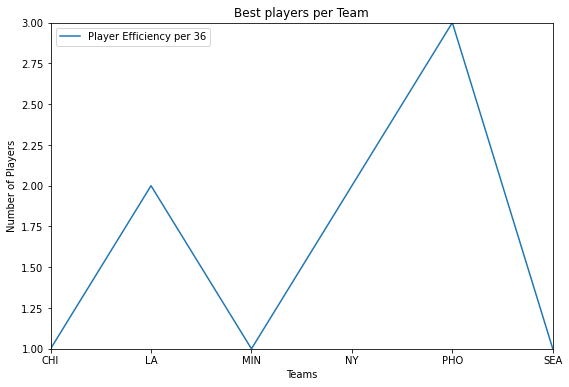

In [104]:
print("""
As regards the number of best team player, we see that out of the 10 most efficient players 3 of them plays in the
Phoenix team which was in the third place and that Minesota who only have 1. 

""")

fig, ax = plt.subplots(1,figsize=(9,6))
lst2 = wnba.sort_values(by = ["Player Efficiency per 36"], ascending = False).head(10).groupby('Team')['Player Efficiency per 36'].count().plot(ax=ax)
plt.xlabel('Teams')
plt.ylabel('Number of Players')
plt.axis([0, 5, 1, 3])

plt.title("Best players per Team")
plt.legend()
plt.show()
